# Histogram Equalization
## What is histogram equalization?
Histogram Equalization is an image processing method to adjust the contrast of an image using it's intensity histogram. 

Histogram equalization is a technique for adjusting image intensities to enhance contrast.

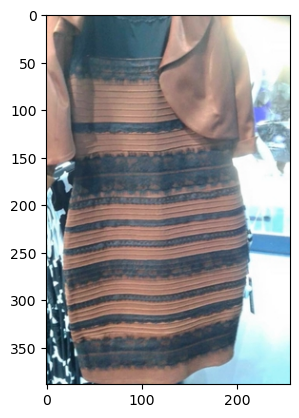

(389, 256, 3)

In [4]:
import matplotlib.pyplot as plt 
import cv2 

img = cv2.imread('The_dress_blueblackwhitegold.jpg')

plt.imshow(img)
plt.show()
img.shape

## Plotting the pixel intensities

In [15]:
import numpy as np

np.max(img), np.min(img)

(255, 0)

## Plotting the Histogram of the RGB Channels

In [5]:
red_channel_img   = img[:, :, 0]
green_channel_img = img[:, :, 1]
blue_channel_img  = img[:, :, 2]

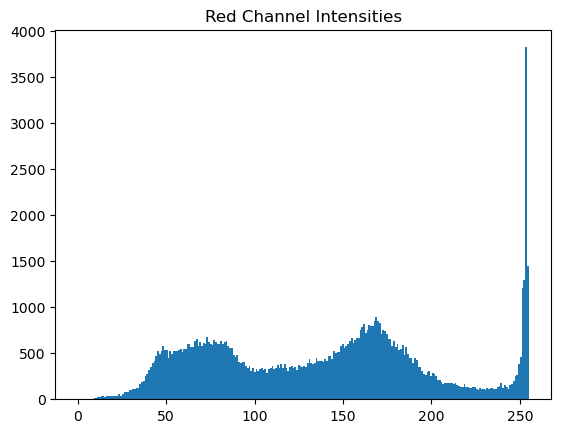

In [16]:
def plot_histogram(channel_intensities, title):
    plt.hist(channel_intensities.ravel(), bins=256, range=(0,255))
    plt.title(title)
    plt.show()

plot_histogram(red_channel_img, 'Red Channel Intensities')

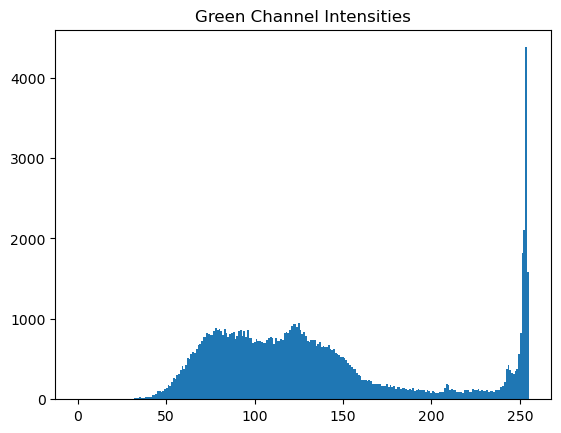

In [17]:
plot_histogram(green_channel_img, 'Green Channel Intensities')

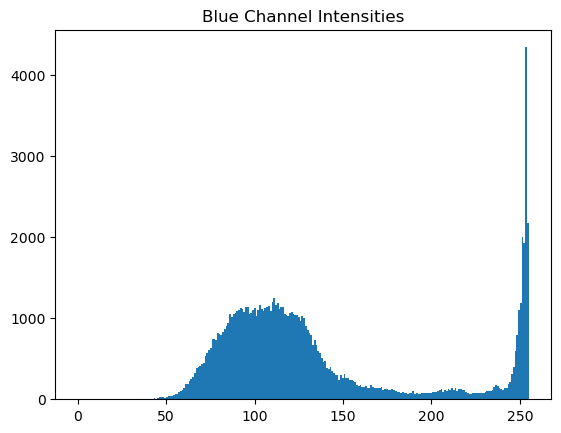

In [18]:
plot_histogram(blue_channel_img, 'Blue Channel Intensities')

cdf, bin_centers = cumulative_distribution(image, nbins)


In [55]:
def calc_cdf(count):
    pdf = count / sum(count)
    # pdf = count # TODO: Uncomment the above line when done debuging
    cdf = np.cumsum(pdf) 
    return cdf


def histogram_equalization(image:np.ndarray, nbins=255):
    hist, bin_centers = np.histogram(image.ravel(), bins=nbins)
    cdf = calc_cdf(hist)

    flattened_img = image.ravel()
    out = []
    for pix in flattened_img:
        out.append(cdf[pix-1])

    out = (np.array(out).reshape(image.shape) * 255).astype('uint8')
    return out 
    # TODO: Map each pixel to corresponding histogram intensity
    
    return hist, bin_centers, cdf
    # cdf, bin_centers = cumulative_distribution(image, nbins)
    # out = np.interp(image.flat, bin_centers, cdf)
    # out = out.reshape(image.shape)
    # # Unfortunately, np.interp currently always promotes to float64, so we
    # # have to cast back to single precision when float32 output is desired
    # return out.astype(utils._supported_float_type(image.dtype), copy=False)

red_equalized_channel = histogram_equalization(red_channel_img)
green_equalized_channel = histogram_equalization(green_channel_img)
blue_equalized_channel = histogram_equalization(blue_channel_img)
# hist, bins, cdf = histogram_equalization(red_channel_img)
# plt.stairs(cdf, bins)
# cdf, np.sort(hist), bins

In [59]:
out = np.zeros(img.shape, dtype='uint8')
out[:, :, 0] = red_equalized_channel
out[:, :, 1] = green_equalized_channel
out[:, :, 2] = blue_equalized_channel

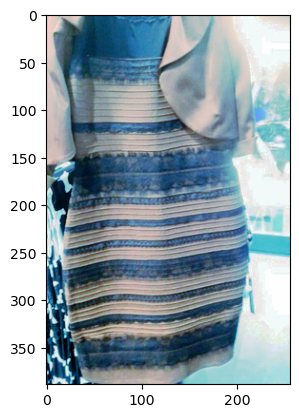

In [61]:
plt.imshow(out)

In [60]:
out

array([[[224, 200, 193],
        [227, 203, 196],
        [230, 205, 198],
        ...,
        [178, 205, 202],
        [180, 205, 202],
        [180, 205, 202]],

       [[224, 200, 193],
        [227, 203, 197],
        [230, 205, 199],
        ...,
        [188, 207, 203],
        [188, 207, 203],
        [193, 207, 204]],

       [[225, 201, 194],
        [229, 204, 197],
        [231, 206, 199],
        ...,
        [194, 208, 203],
        [193, 207, 203],
        [197, 208, 204]],

       ...,

       [[ 10,  83, 115],
        [  5,  71, 100],
        [ 85, 175, 193],
        ...,
        [165, 221, 222],
        [165, 221, 222],
        [163, 220, 220]],

       [[  9,  85, 118],
        [  5,  77, 108],
        [ 90, 182, 195],
        ...,
        [165, 221, 222],
        [165, 221, 222],
        [165, 221, 222]],

       [[  7,  85, 120],
        [  6,  77, 115],
        [ 18,  91, 134],
        ...,
        [165, 221, 222],
        [165, 221, 222],
        [167, 222, 225]]

(array([10258.,  9802., 10062.,  9848., 10053., 10034., 10355.,  9614.,
         9808.,  9750.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

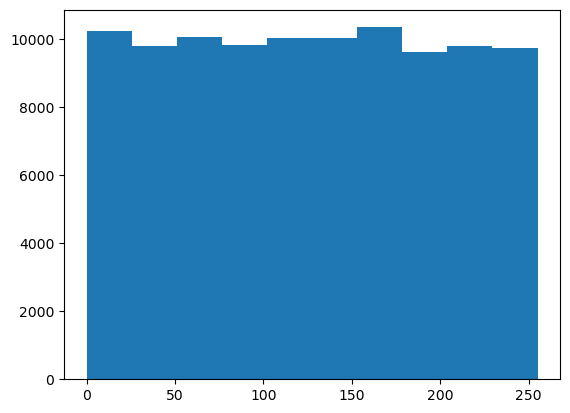

In [47]:
plt.hist(out.ravel())

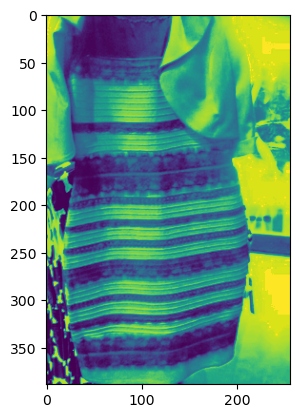

In [48]:
plt.imshow(out)

In [38]:
cdf.shape

(255,)